In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro,kstest,normaltest,skew
import statsmodels.api as sm

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

### 1.Problem Statment

### 2.Data Gathering

In [2]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 3.Exploratory Data Analysis(EDA)

In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.Car_Name.value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [6]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

### 4.feature Engineering

##### Encoding

In [7]:
df = pd.get_dummies(df,columns=['Fuel_Type'], dtype = int)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,0,1,0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,0,0,1
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,0,0,1
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,0,1,0


In [8]:
#df["Fuel_Type"].value_counts

In [9]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [10]:
df["Seller_Type"].replace({"Dealer":0,"Individual":1},inplace = True)
#df

In [11]:
Seller_Type_Data = {"Dealer":0,"Individual":1}

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          301 non-null    object 
 1   Year              301 non-null    int64  
 2   Selling_Price     301 non-null    float64
 3   Present_Price     301 non-null    float64
 4   Kms_Driven        301 non-null    int64  
 5   Seller_Type       301 non-null    int64  
 6   Transmission      301 non-null    object 
 7   Owner             301 non-null    int64  
 8   Fuel_Type_CNG     301 non-null    int32  
 9   Fuel_Type_Diesel  301 non-null    int32  
 10  Fuel_Type_Petrol  301 non-null    int32  
dtypes: float64(2), int32(3), int64(4), object(2)
memory usage: 22.5+ KB


In [13]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [15]:
df["Transmission"].replace({"Manual":0,"Automatic":1},inplace = True)
df["Transmission"].value_counts()

Transmission
0    261
1     40
Name: count, dtype: int64

In [16]:
Transmission_data = {"Manual":0,"Automatic":1}

### 5.Feature Selection/Extraction

##### 5.1 Linearity

In [17]:
x = df.drop(["Car_Name",],axis = 1)
x

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,0,0,0,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,1,0
2,2017,7.25,9.85,6900,0,0,0,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,1,0
297,2015,4.00,5.90,60000,0,0,0,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          301 non-null    object 
 1   Year              301 non-null    int64  
 2   Selling_Price     301 non-null    float64
 3   Present_Price     301 non-null    float64
 4   Kms_Driven        301 non-null    int64  
 5   Seller_Type       301 non-null    int64  
 6   Transmission      301 non-null    int64  
 7   Owner             301 non-null    int64  
 8   Fuel_Type_CNG     301 non-null    int32  
 9   Fuel_Type_Diesel  301 non-null    int32  
 10  Fuel_Type_Petrol  301 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(1)
memory usage: 22.5+ KB


In [19]:
x.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Year,1.000000,0.236141,-0.047584,-0.524342,-0.039896,-0.000394,-0.182104,-0.017790,0.064315,-0.059959
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.550724,0.367128,-0.088344,-0.025164,0.552339,-0.540571
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.512030,0.348715,0.008057,-0.011500,0.473306,-0.465244
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.101419,0.162510,0.089216,0.012223,0.172515,-0.172874
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,1.000000,-0.063240,0.124269,-0.060300,-0.350467,0.358321
Transmission,-0.000394,0.367128,0.348715,0.162510,-0.063240,1.000000,0.050316,-0.032018,0.098643,-0.091013
Owner,-0.182104,-0.088344,0.008057,0.089216,0.124269,0.050316,1.000000,-0.014272,-0.053469,0.055687
Fuel_Type_CNG,-0.017790,-0.025164,-0.011500,0.012223,-0.060300,-0.032018,-0.014272,1.000000,-0.040808,-0.160577
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.350467,0.098643,-0.053469,-0.040808,1.000000,-0.979648
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.358321,-0.091013,0.055687,-0.160577,-0.979648,1.000000


<Axes: >

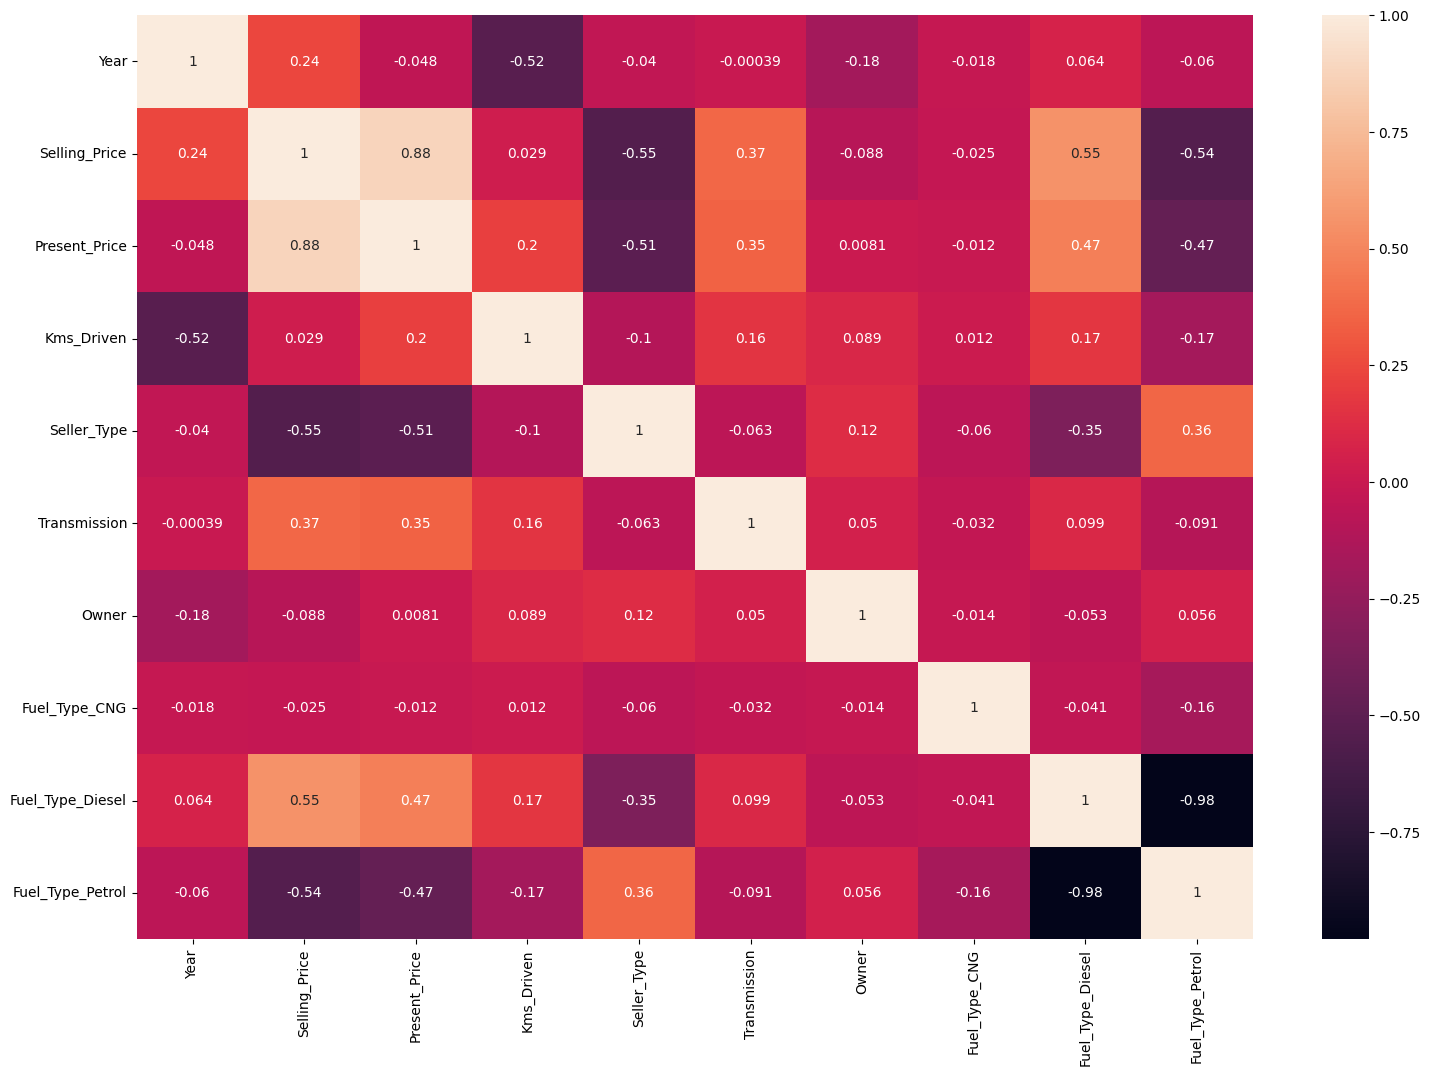

In [20]:
plt.figure(figsize = (18,12))
sns.heatmap(x.corr(), annot = True)

<Axes: >

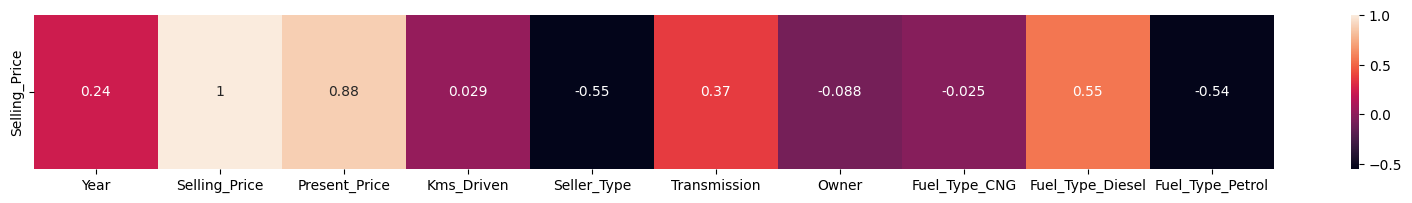

In [21]:
plt.figure(figsize = (20,2))
sns.heatmap(x.corr().iloc[1:2], annot = True)

In [22]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,0,0,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,0,0,1,0
297,brio,2015,4.00,5.90,60000,0,0,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,0,0,1
299,city,2017,11.50,12.50,9000,0,0,0,0,1,0


In [23]:
x = df.drop(['Selling_Price', 'Car_Name'], axis = 1)
y = df['Selling_Price']
x

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,5.59,27000,0,0,0,0,0,1
1,2013,9.54,43000,0,0,0,0,1,0
2,2017,9.85,6900,0,0,0,0,0,1
3,2011,4.15,5200,0,0,0,0,0,1
4,2014,6.87,42450,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,0,0,0,1,0
297,2015,5.90,60000,0,0,0,0,0,1
298,2009,11.00,87934,0,0,0,0,0,1
299,2017,12.50,9000,0,0,0,0,1,0


##### 5.2 VIF

In [24]:
x.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Seller_Type', 'Transmission',
       'Owner', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [25]:
array = x.values
array.ndim

2

In [26]:
variance_inflation_factor(x.to_numpy(), 0)

1.4823467547289362

In [27]:
variance_inflation_factor(x.to_numpy(), 1)

1.8369267328238557

In [28]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(), i)
    vif_list.append(vif)

vif_values = pd.Series(vif_list, index = x.columns)
vif_values

Year                     1.482347
Present_Price            1.836927
Kms_Driven               1.517916
Seller_Type              1.449644
Transmission             1.196263
Owner                    1.056734
Fuel_Type_CNG         4799.482845
Fuel_Type_Diesel    144156.552200
Fuel_Type_Petrol    573572.157278
dtype: float64

<Axes: >

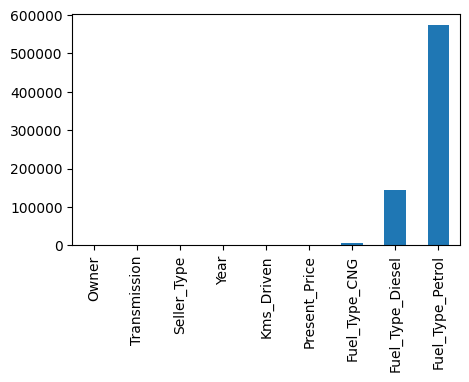

In [29]:
plt.figure(figsize = (5,3))
vif_values.sort_values().plot(kind = 'bar')

### 6. Model Traning

In [30]:
x = df.drop(['Selling_Price', 'Car_Name'], axis = 1)
y = df['Selling_Price']

In [31]:
x.shape

(301, 9)

In [32]:
y.shape

(301,)

In [33]:
df.shape

(301, 11)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                   random_state = 11)
x_test

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
150,2011,0.826,6000,1,0,0,0,0,1
12,2015,9.940,15000,0,1,0,0,0,1
294,2014,6.800,33019,0,0,0,0,0,1
295,2015,13.090,60076,0,0,0,0,1,0
60,2013,18.610,40001,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
212,2016,13.600,22671,0,0,0,0,0,1
262,2015,5.800,40023,0,0,0,0,0,1
70,2014,6.760,71000,0,0,0,0,1,0
202,2015,5.700,28200,0,0,0,0,0,1


In [35]:
y_test

150     0.50
12      7.50
294     3.75
295     8.55
60      6.95
       ...  
212    11.25
262     4.00
70      3.95
202     4.40
170     0.40
Name: Selling_Price, Length: 61, dtype: float64

#### Instantiating Linear Regression Model

In [36]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)# Training of Lienar Regression Model
# Gradient Descent Algorithm

LinearRegression()

In [37]:
np.around(linear_reg.coef_,2)

array([ 0.43,  0.54, -0.  , -0.3 ,  0.53, -0.95, -0.81,  1.21, -0.41])

In [38]:
linear_reg.intercept_

-861.7980037971929

### 7. Model Evaluation

In [39]:
x_test

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
150,2011,0.826,6000,1,0,0,0,0,1
12,2015,9.940,15000,0,1,0,0,0,1
294,2014,6.800,33019,0,0,0,0,0,1
295,2015,13.090,60076,0,0,0,0,1,0
60,2013,18.610,40001,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
212,2016,13.600,22671,0,0,0,0,0,1
262,2015,5.800,40023,0,0,0,0,0,1
70,2014,6.760,71000,0,0,0,0,1,0
202,2015,5.700,28200,0,0,0,0,0,1


In [40]:
y_test[20:25]

16     7.25
233    3.90
300    5.30
2      7.25
137    0.65
Name: Selling_Price, dtype: float64

In [41]:
y_pred = linear_reg.predict(x_test)
y_pred[20:25]

array([8.33138202, 4.69086178, 4.68000545, 7.22218186, 0.30377231])

##### residual of testing data

In [42]:
residual = y_test - y_pred
residual[10:15]

257    0.273693
201    0.234259
204   -0.608809
126   -1.271843
193    0.958274
Name: Selling_Price, dtype: float64

#### Testing data Evaluation

In [43]:
y_pred_test = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print('mean_squared_error      :', mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" ,rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print('mean_absolute_error     :', mae)

r_value = r2_score(y_test, y_pred_test)
print("R-Squared Value         :",r_value)

n = x_test.shape[0]
k = x_test.shape[1]

adj_r2 = 1 - ((1 - r_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

mean_squared_error      : 5.3426661557629105
Root Mean Squared Error : 2.311420808888531
mean_absolute_error     : 1.235860664061734
R-Squared Value         : 0.8429605348613087
Adjusted R-Squared Value: 0.8152476880721279


#### Training Data evaluation

In [44]:
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print('mean_squared_error      :', mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" ,rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('mean_absolute_error     :', mae)

r_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r_value)

n = x_train.shape[0]
k = x_train.shape[1]

adj_r2 = 1 - ((1 - r_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

mean_squared_error      : 2.994058579662328
Root Mean Squared Error : 1.7303348172138038
mean_absolute_error     : 1.1941021434235144
R-Squared Value         : 0.8729748075952637
Adjusted R-Squared Value: 0.8680042565881219


### Normality of Residual

#### residual of train data

In [45]:
y_train[10:15]

136    0.65
26     4.15
95     5.85
206    5.75
273    2.25
Name: Selling_Price, dtype: float64

In [46]:
y_pred_train[10:15]

array([0.91982039, 3.15283281, 9.48626719, 5.73680224, 2.71488307])

In [47]:
residual_train = y_train - y_pred_train
residual_train[10:15]

136   -0.269820
26     0.997167
95    -3.636267
206    0.013198
273   -0.464883
Name: Selling_Price, dtype: float64

### visualization Tools

#### 1.1 kdeplot

<Axes: xlabel='Selling_Price', ylabel='Density'>

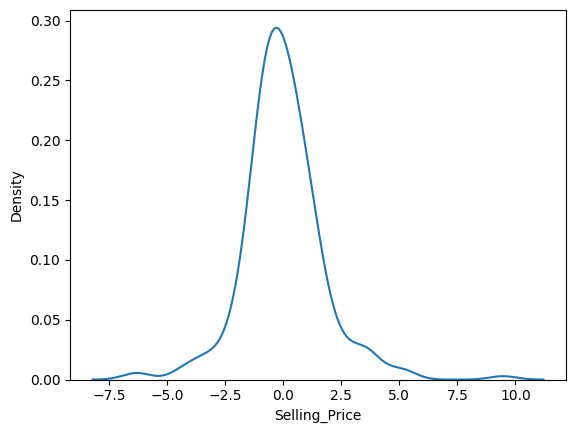

In [48]:
sns.kdeplot(residual_train)

#### 1.2  histplot

<Axes: xlabel='Selling_Price', ylabel='Count'>

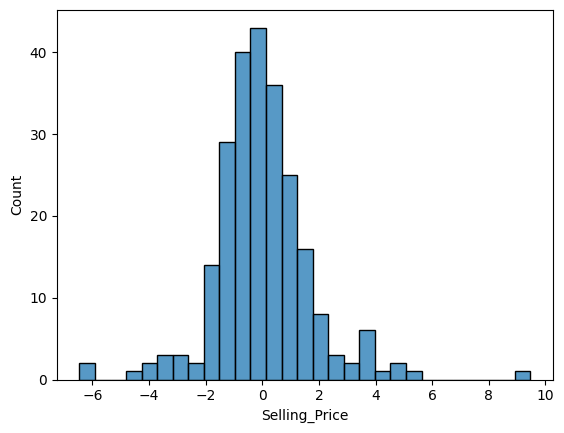

In [49]:
sns.histplot(residual_train)

#### 1.3  distplot

<Axes: xlabel='Selling_Price', ylabel='Density'>

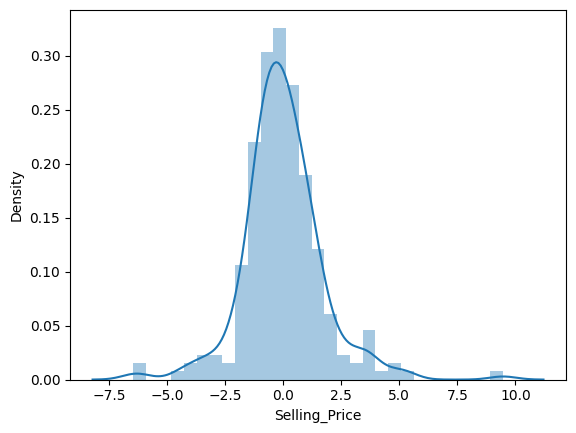

In [50]:
sns.distplot(residual_train)

### 2. QQ-Plot

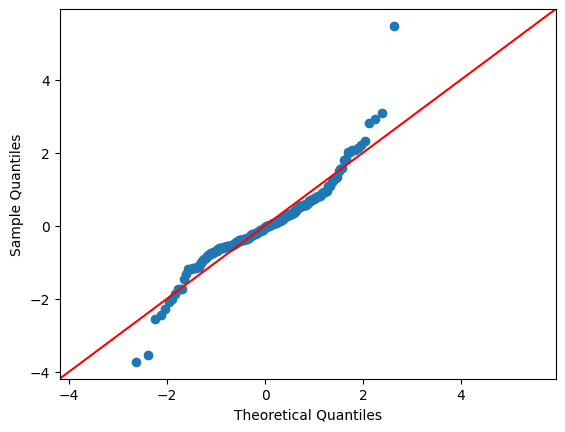

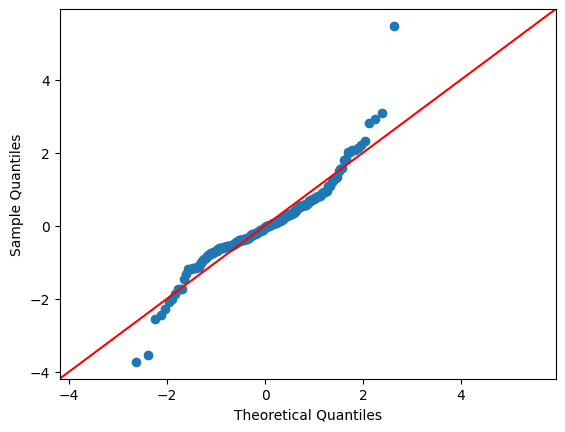

In [51]:
sm.qqplot(residual_train,line="45",fit=True)

#### 3. Hypothesis Testing:

#### 1. shapiro test

In [52]:
_,p_val=shapiro(residual_train)
print("p_val:" ,p_val)
if p_val >0.05:
    print("NULL hypothesis is True")
    print("data normally distributed")
else:
    print("Alternate hypothesis is True")
    print("data not normally distributed")

p_val: 1.4649554902490536e-09
Alternate hypothesis is True
data not normally distributed


#### 2. kstest test

In [53]:
_,p_val=kstest(residual_train, "norm")
print("p_val:" ,p_val)
if p_val >0.05:
    print("NULL hypothesis is True")
    print("data normally distributed")
else:
    print("Alternate hypothesis is True")
    print("data not normally distributed")

p_val: 0.027471118756272506
Alternate hypothesis is True
data not normally distributed


#### 3. normal test

In [54]:
_,p_val=normaltest(residual_train)
print("p_val:" ,p_val)
if p_val >0.05:
    print("NULL hypothesis is True")
    print("data normally distributed")
else:
    print("Alternate hypothesis is True")
    print("data not normally distributed")

p_val: 5.85831722733678e-11
Alternate hypothesis is True
data not normally distributed


### 4. Skewness

#### 4.1 Positive Skewnees

In [55]:
mean=residual_train.mean()
median=residual_train.median()
skew=residual_train.skew()
print("mean: ",mean)
print("median: ",median)
print("skew: ",skew)

if mean>median:
    print("positive skewed data")
    print("skew:",skew)
elif mean<median:
    print("Negativly skewed data")
    print("skew:",skew)
else:
    print("Symmetric skewed data")
    print("skew:",skew)

mean:  -2.969846590872294e-14
median:  -0.08591494850776371
skew:  0.605512214823487
positive skewed data
skew: 0.605512214823487


<Axes: xlabel='Selling_Price', ylabel='Density'>

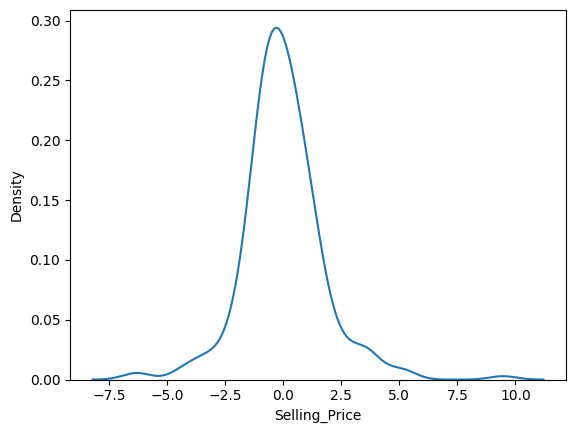

In [56]:
sns.kdeplot(residual_train)

### Single Row testing

In [57]:
x_test[10:11]

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
257,2015,13.6,40324,0,0,0,0,0,1


In [58]:
linear_reg.feature_names_in_

array(['Year', 'Present_Price', 'Kms_Driven', 'Seller_Type',
       'Transmission', 'Owner', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'], dtype=object)

In [59]:
#df

In [60]:
columns_names = x.columns.tolist()
columns_names

['Year',
 'Present_Price',
 'Kms_Driven',
 'Seller_Type',
 'Transmission',
 'Owner',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol']

In [61]:
linear_reg.n_features_in_

9

In [62]:
Year                  = 2015
Present_Price         = 13.6
Kms_Driven            = 40324
Fuel_Type             = "CNG"
Seller_Type           = "Dealer"
Transmission          = "Manual"
Owner                 = 0



Seller_Type = Seller_Type_Data[Seller_Type]
Transmission = Transmission_data[Transmission]
Fuel_Type = "Fuel_Type_" + Fuel_Type


Fuel_Type_index =columns_names.index(Fuel_Type)
Fuel_Type_index


test_array = np.zeros([1,linear_reg.n_features_in_])

test_array[0,0] = Year
test_array[0,1] = Present_Price
test_array[0,2] = Kms_Driven
test_array[0,Fuel_Type_index] = 1
test_array[0,4] = Seller_Type
test_array[0,5] = Transmission
test_array[0,6] = Owner


predict_charges = np.around(linear_reg.predict(test_array)[0], 2)
predict_charges

8.63

### pickle and json

In [63]:
with open("linear_regression_car_dekho.pkl", 'wb') as f:
    pickle.dump(linear_reg, f)


In [64]:
Project_Data = {'Seller_Type':Seller_Type_Data,
               'Transmission':Transmission_data,
              'Columns_Names':columns_names }

with open ('car_dekho_project_data.json', 'w') as f:
    json.dump(Project_Data,f)